<a href="https://colab.research.google.com/github/VenkataDarmaTeja/DL-experiments/blob/main/exp_2_DL.single%20layer%20perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import pandas as pd


In [86]:
data = pd.read_csv("/content/heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [87]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
data["HeartDisease"]=encode.fit_transform(data["HeartDisease"])
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [89]:
x=data[data.columns[3:8]][:400]
x


,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR
0,140,289,0,Normal,172
1,160,180,0,Normal,156
2,130,283,0,ST,98
3,138,214,0,Normal,108
4,150,195,0,Normal,122
...,...,...,...,...,...
395,135,0,1,Normal,150
396,140,0,1,Normal,143
397,170,0,1,ST,105
398,165,0,1,Normal,122


In [90]:
y=data["HeartDisease"][:400]

In [91]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=24)


In [101]:
x_train = np.array(x_train, dtype=float)

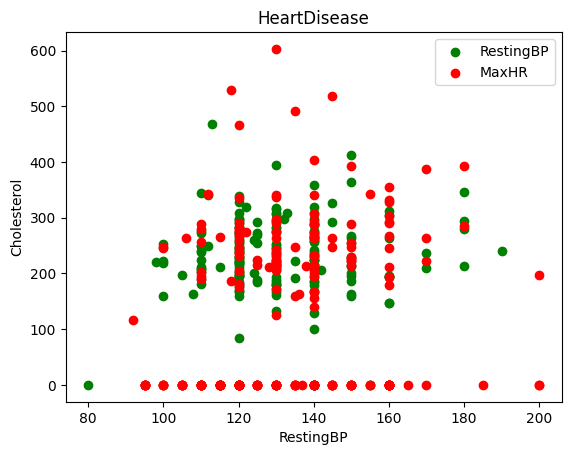

In [98]:
plt.scatter(x[y==0]["RestingBP"],x[y==0]["Cholesterol"], color='green', label='RestingBP')
plt.scatter(x[y==1]["RestingBP"],x[y==1]["Cholesterol"], color='red', label='MaxHR') # Use column names to index DataFrame
plt.title('HeartDisease')
plt.xlabel('RestingBP')
plt.ylabel('Cholesterol')
plt.legend()
plt.show()

In [80]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
n_hidden=50
n_epochs=1000
learning_rate=1
weights_hidden=np.random.normal(0.0,size=(x_train.shape[1],n_hidden))
weights_output=np.random.normal(0.0,size=(n_hidden))
hist_loss=[]
hist_accuracy=[]
print(weights_hidden)
print(weights_output)

[[-0.49769598 -0.50065472 -0.56429246  0.85071937  0.68239046  0.37907507
  -1.24641011 -1.65089972  0.74497732 -1.37794051  0.5065217   0.48577655
   0.67438396 -0.44874445  0.81733473 -0.77208998  0.25263444 -0.3026924
   0.4945759  -1.55754885  1.82926305 -0.11270382  0.63317664  0.30961922
   0.10848428 -2.49322168 -0.90552162  0.6879476  -2.08877599 -2.49569998
  -0.51985389  0.47107039  0.45542944  1.58839409 -0.90024734 -0.58955279
   0.48696276 -0.20727067 -0.18969928  1.27002873 -0.68065944 -0.11179675
   1.37517209 -0.25093812  1.37169608  0.87796588 -0.26014788 -1.67209496
   0.61449413  0.54801081]
 [ 0.19016117 -1.21432083 -0.0121043   0.01850018  2.21412628 -0.94696491
  -0.75725575 -0.26202799 -1.30876417  0.26714037 -0.76677053 -1.73080255
  -0.04935007 -0.2289713  -0.90419457  1.12943995  0.46700836 -1.02159151
   0.54808884  1.13206122  0.16747819  0.64121969 -1.30931286 -1.83005948
   0.05739692 -0.64126571  0.26301689  0.89697899  3.66693947  0.57672676
   0.7191051